# Topic: Predict the Customer Churn for ABC Bank

Dataset: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data

## Perform EDA and understand the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc

Read dataset

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Simple Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Drop customer_id column because it a unique value for each customer, so it doesn't have any predictive value for predict customer churn in ABC Bank

In [5]:
df = df.drop(['customer_id'], axis=1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Duplicated Value Check

In [6]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, churn]
Index: []


Missing Value Check

In [7]:
missing_values = df.isnull().mean()*100
data_type = df.dtypes
unique_values_count = df.nunique()

summary_1 = pd.DataFrame({
    'Null %': missing_values,
    'Datatype': data_type,
    'Unique value': unique_values_count
})

summary_1.sort_values(by = 'Null %', ascending= False)

,Null %,Datatype,Unique value
credit_score,0.0,int64,460
country,0.0,object,3
gender,0.0,object,2
age,0.0,int64,70
tenure,0.0,int64,11
balance,0.0,float64,6382
products_number,0.0,int64,4
credit_card,0.0,int64,2
active_member,0.0,int64,2
estimated_salary,0.0,float64,9999


### Plot

Plot for categorical_columns vs churn

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27616\2584132284.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['churn'], palette='coolwarm')


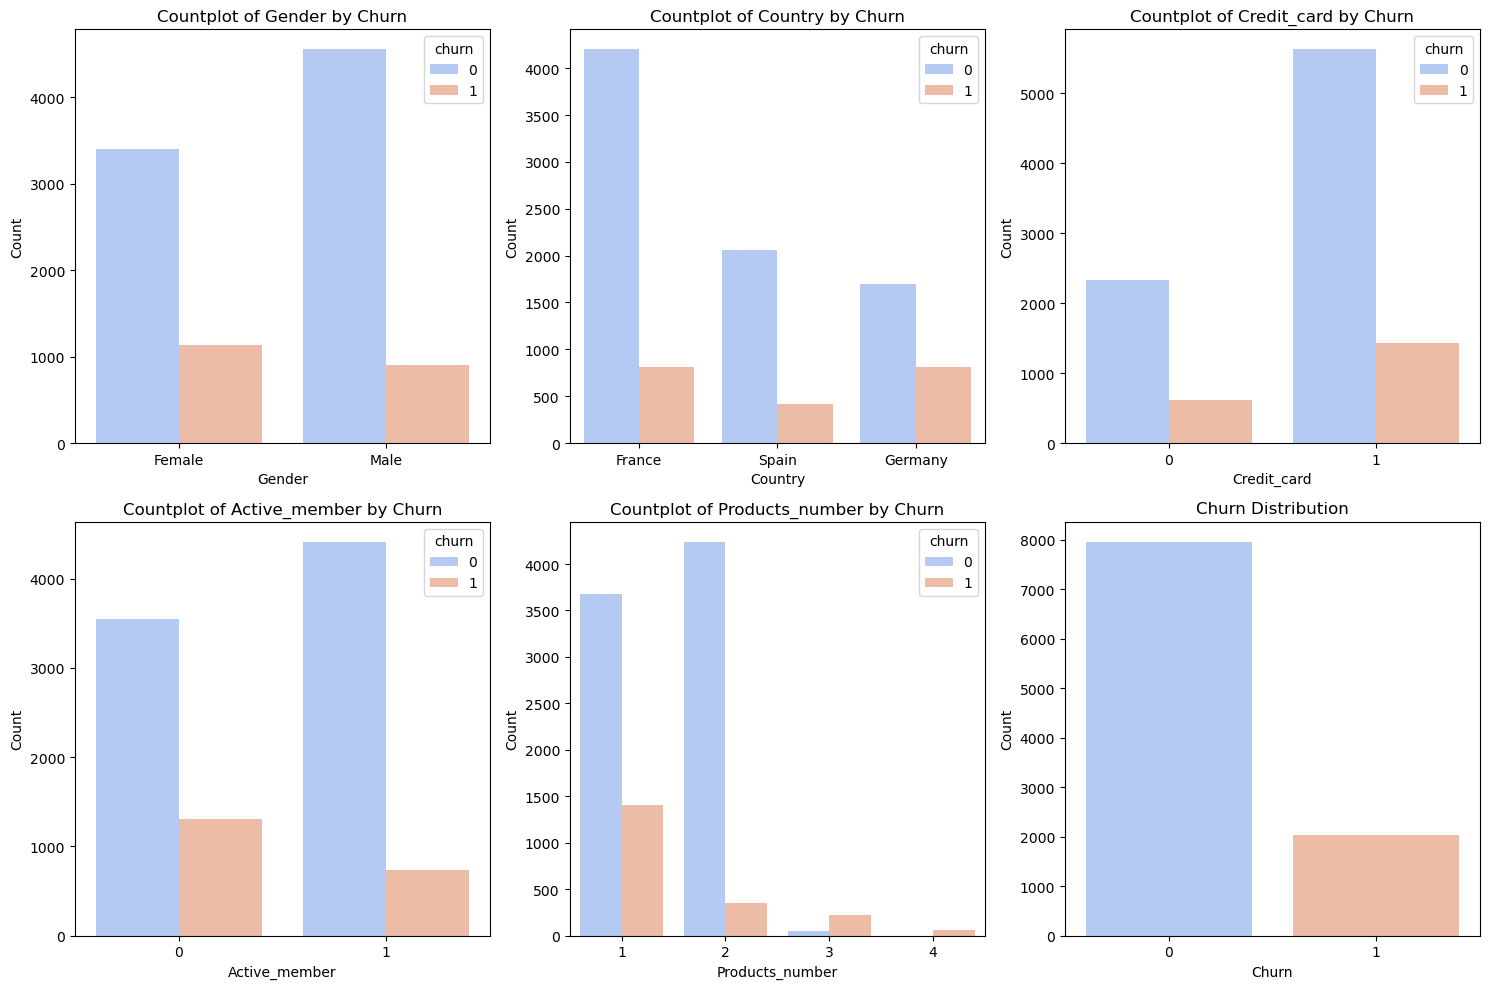

In [ ]:
categorical_columns = ['gender', 'country', 'credit_card','active_member','products_number']

plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[var], hue=df['churn'], palette='coolwarm')
    plt.title(f'Countplot of {var.capitalize()} by Churn')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')

plt.subplot(2, 3, 6)
sns.countplot(x=df['churn'], palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Plot for continuous column vs churn

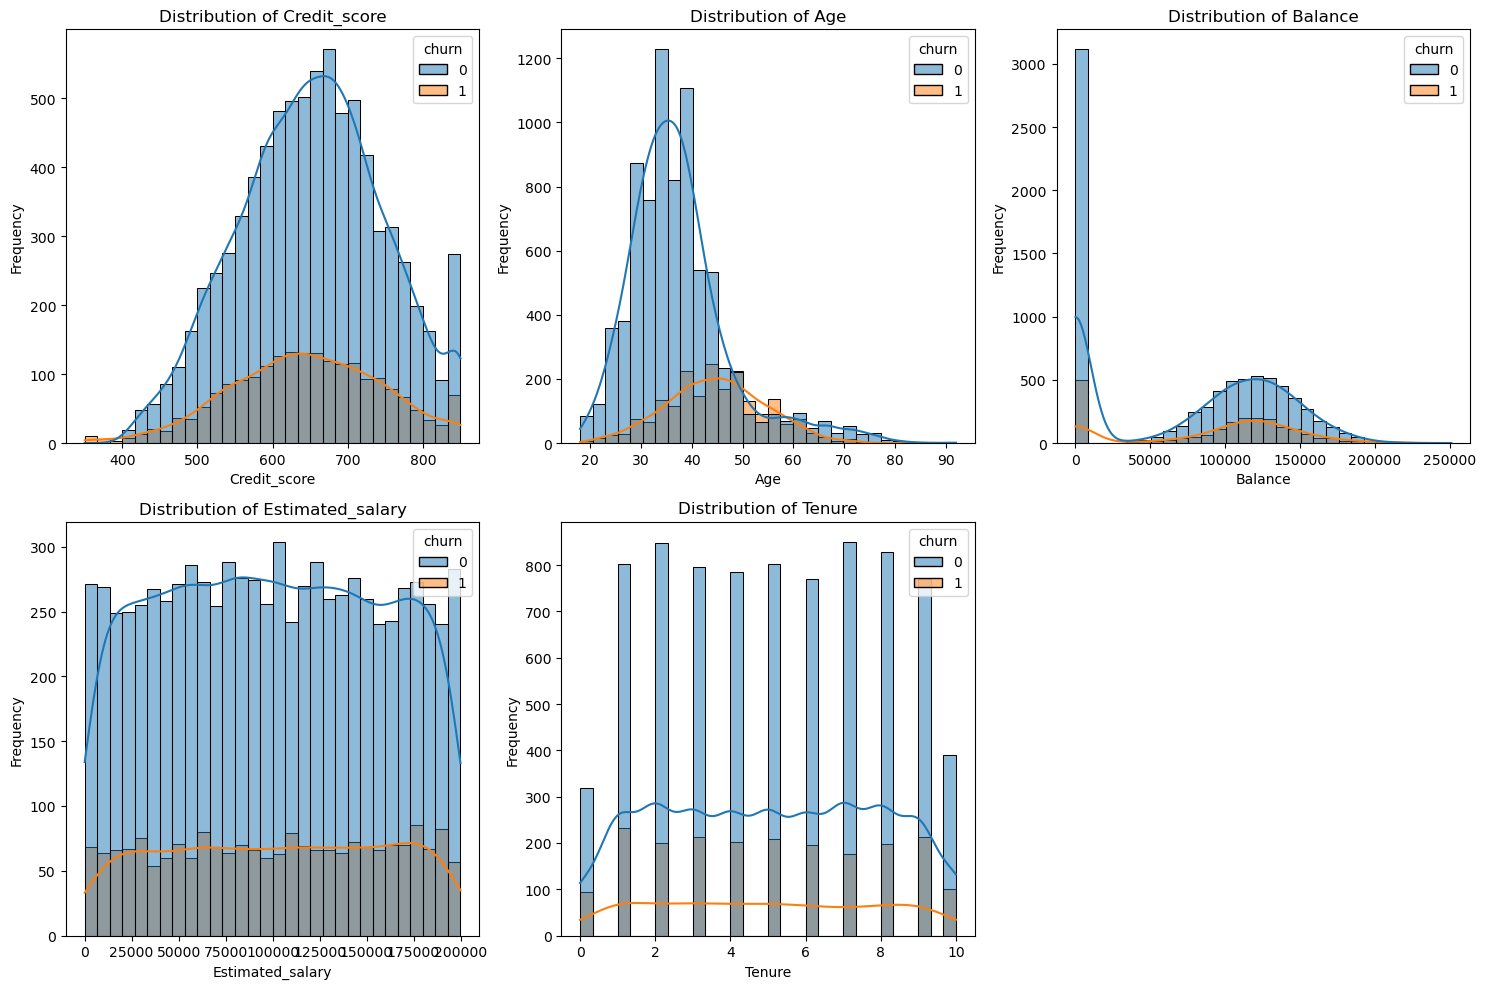

In [9]:
numerical_columns = ['credit_score','age', 'balance', 'estimated_salary','tenure']

plt.figure(figsize=(15,10))
for i, var in enumerate(numerical_columns,1):
    plt.subplot(2,3,i)
    sns.histplot(x = df[var], kde=True, bins=30, hue = df['churn'])
    plt.title(f'Distribution of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Check outlier with boxplot

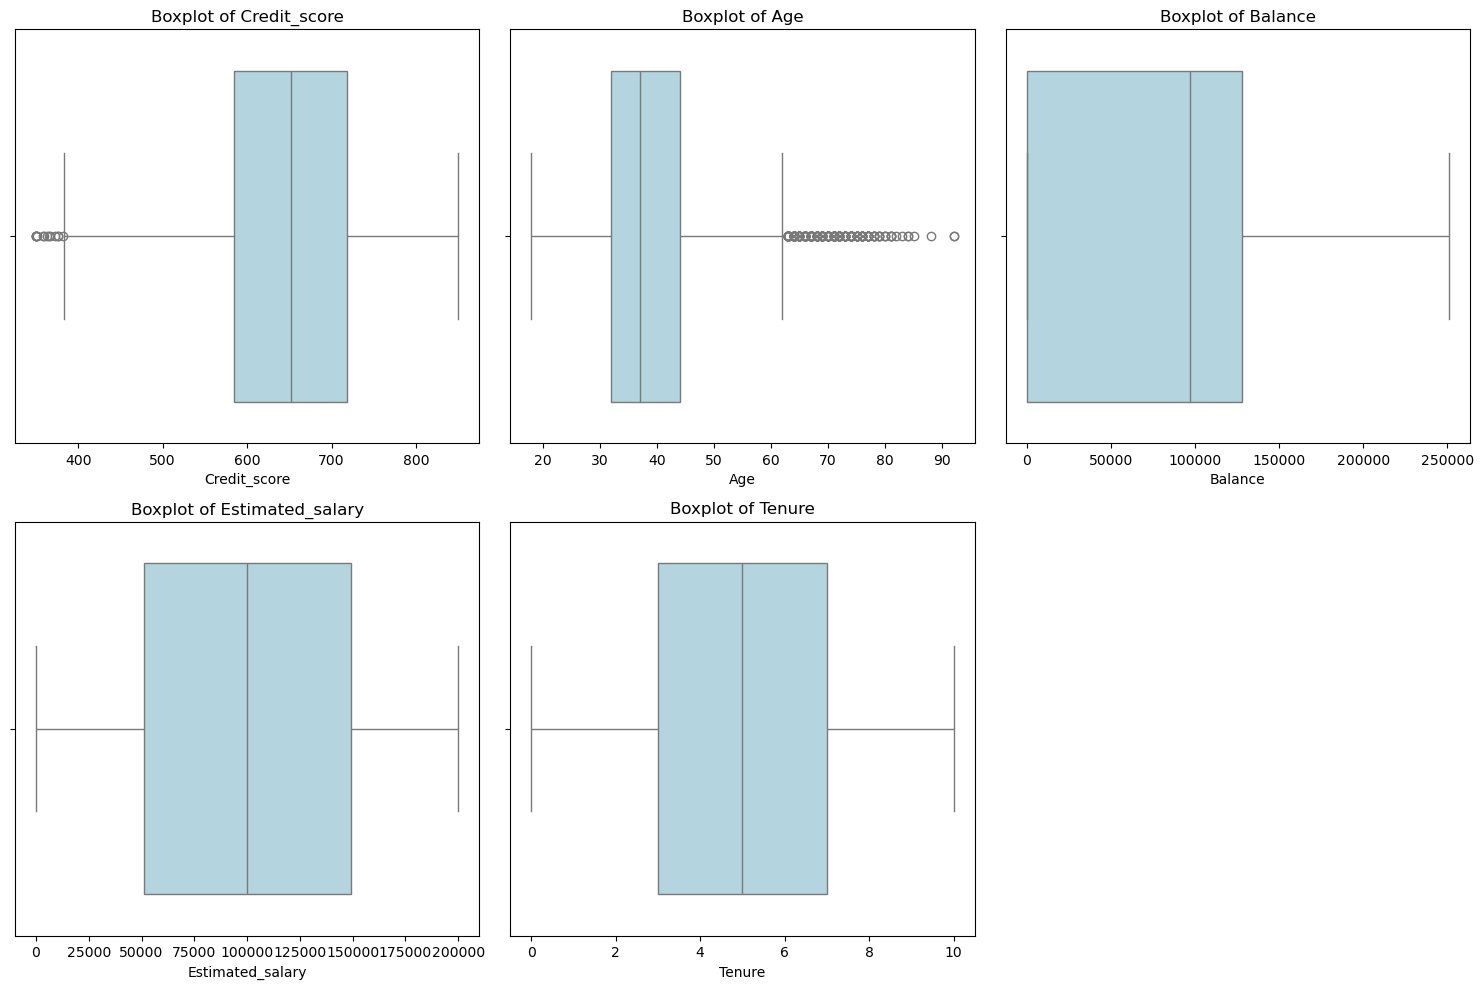

In [10]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[var], color='lightblue')
    plt.title(f'Boxplot of {var.capitalize()}')
    plt.xlabel(var.capitalize())

plt.tight_layout()
plt.show()

In [11]:
for var in numerical_columns:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"Number of outliers in {var}: {outliers.shape[0]}")


Number of outliers in credit_score: 15
Number of outliers in age: 359
Number of outliers in balance: 0
Number of outliers in estimated_salary: 0
Number of outliers in tenure: 0


In [12]:
print(df['age'].min(), df['age'].max())

18 92


In this case Age outlier are still a valid data because the bank has a diverse customer age range.

In [13]:
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

credit_score_outliers = df[df['credit_score'] < lower_bound]

In [14]:
percentage_outliers = len(credit_score_outliers) / len(df) * 100
print(f'Percentage of outliers: {percentage_outliers:.2f}%')


Percentage of outliers: 0.15%


In [15]:
print(f'Value of outliers: {credit_score_outliers["credit_score"].values}')

Value of outliers: [376 376 363 359 350 350 358 351 365 367 350 350 382 373 350]


Because the outliers make up a small percentage of the dataset and the outlier values are not extremely low, I decided to keep the outliers. This decision allows for a more accurate representation of the population and helps to avoid biased analysis.

### Correlation

In [16]:
df_matrix = df

In [17]:
df_matrix['gender'] = df_matrix['gender'].map({'Male': 0, 'Female' : 1}).astype(int)
df_matrix = df_matrix.drop(['country'], axis=1)


1. Change the value of gender become 0 and 1 (binary) and change the datatype into integer
2. Delete country column because can't use labeling (1,2,3,4). It will make a false sense of scale because of the order

In [18]:
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   gender            10000 non-null  int32  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
dtypes: float64(2), int32(1), int64(7)
memory usage: 742.3 KB


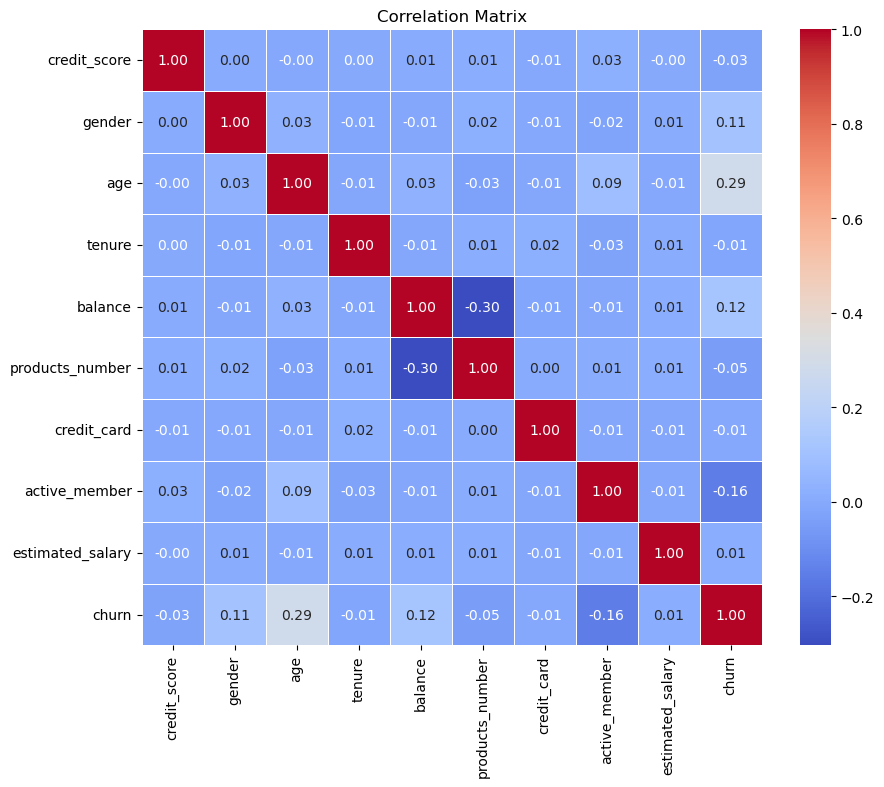

In [19]:
corr_matrix = df_matrix.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1. The table above is a correlation matrix table that shows the correlations beetwen variables from 1 to -1 (positive to negative correalation)
2. From the matrix table it shows that age and churn has the strongest positive correlation meaning that older customer often leave
3. Balance and product number has the strongest negative correlation meaning that customers with more products tend to have lower balances.

## Preprocess the data

### Feature Encoding

In [20]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


Robust Scaler for credit score, balance, estimated_salary,  and age<br>
Because i want to retain the outliers, i use Robust Scaler to reduce the outliers impact in the scaling porcess & suitable for skewed data to imporve model performance.

One Hot Encoding for Country & Gender Column<br>
Because it has limited number of unque value & No Inheret order to prevent misinterpretation

Ordinal Encoding for products number<br>
Because the products_number feature is a sensible decision, especially given the context that "more products mean better."

### Split dataset into pipeline

In [ ]:
X = df.drop(columns=['churn'])  
y = df['churn'] 

In [ ]:
numerical_features = ['credit_score', 'balance', 'estimated_salary', 'age']
categorical_features = ['country', 'gender']
ordinal_features = ['products_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features), 
        ('cat', OneHotEncoder(), categorical_features),  
        ('ord', OrdinalEncoder(), ordinal_features)  
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

## Train

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['credit_score', 'balance',
                                                   'estimated_salary', 'age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['country', 'gender']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['products_number'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Evaluate the models and explain the results

In [ ]:
test_accuracy = pipeline.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Test Accuracy: 0.85

Confusion Matrix:
[[1523   84]
 [ 216  177]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.68      0.45      0.54       393

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



1. The model performs well overall with an accuracy of 85%.
2. It excels at predicting class 0 but struggles significantly with class 1, as indicated by lower precision and recall for that class.
3. The confusion matrix shows that while it correctly identifies a large number of class 0 instances, it has more false negatives for class 1, suggesting that the model may need tuning or additional features to improve its performance for minority class predictions.

Because of our dataset, a bank churn prediction, a False Negative is more important.<br>
- False Negatives (FN): The model missed 216 instances of class 1, classifying them as class 0.

## Perform fine-tuning using GridSearchCV, explain the result

In [ ]:
param_grid = {
    'classifier__n_estimators': [10, 20, 50, 80, 100, 150, 200],
    'classifier__max_features': [None, 'sqrt', 'log2'],  
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 8, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='recall', 
                           cv=5,  
                           error_score= 'raise',
                           verbose=1,
                           n_jobs=-1)  

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)


Fitting 5 folds for each of 1260 candidates, totalling 6300 fits


Best Parameters: {'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 10}
Best Cross-Validation Accuracy: 0.4598394988509155


The result shows the best parameters and the best cross validation.<br>Next, i will refill the the model with it and evaluate it after.

In [ ]:
best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy with Best Parameters: {test_accuracy}")

y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Test Accuracy with Best Parameters: 0.837

Confusion Matrix:
[[1491  116]
 [ 210  183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1607
           1       0.61      0.47      0.53       393

    accuracy                           0.84      2000
   macro avg       0.74      0.70      0.72      2000
weighted avg       0.82      0.84      0.83      2000



### Evaluation

Even though precision and accuracy are decreasing, the increase in recall is more important in our case because a False Negative is more impactful than a False Positive. From the evaluation the recall has increased from 0.45 to 0.47 around 2%.

For example, a False Positive occurs when the model predicts that a customer will churn, but they don’t actually leave. The impact is merely a waste of resources and effort in trying to retain customers who had no intention of leaving.

In contrast, a False Negative—where the model fails to predict that a customer will churn—results in a missed opportunity to retain a valuable customer, potentially leading to revenue loss and a decrease in customer lifetime value. This is far more detrimental to the business.

## Explain what is the ROC curve and what does it tell us about a classification model's performance

ROC is Receiver Operating Characteristics. ROC curve is a graph that represent True Positive Rate (TPR) the proportion of actual positives correctly predicted by the model, against the False Positive Rate (FPR) the proportion of actual negatives incorrectly classified as positives. The purpose of it is to give a visual representation of model performance accross all thresholds.

The closer the ROC curve to the top-left of the graph, the better the model is at distinguish beetwen positive and negative classes.<br> For Example, using our model be like:

In [ ]:
y_prob = grid_search.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

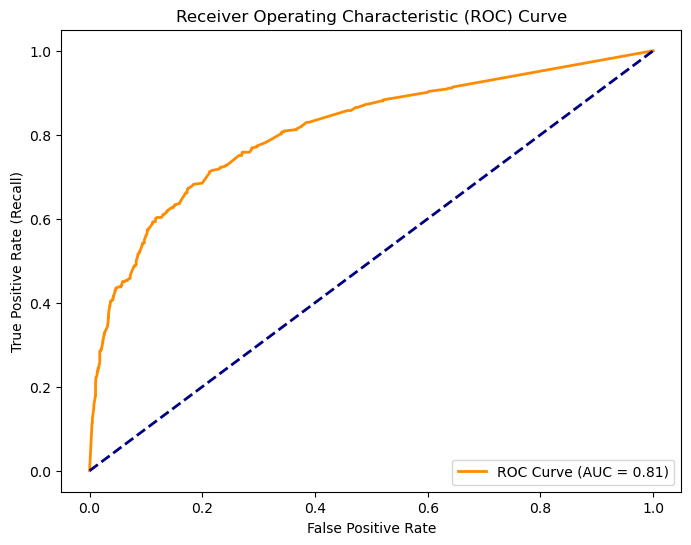

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

An AUC that score reflects the model's ability to distinguish between churners and non-churners effectively of 0.81 indicates that the model performs fairly well. A perfect model would have an AUC of 1.0, while a random model would have 0.5.

## Next i want to improve the recall with modfying the threshold 

In [ ]:
optimal_idx = np.argmax(tpr - fpr)  
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

y_pred_custom = (y_prob >= optimal_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


Optimal Threshold: 0.24
[[1265  342]
 [ 113  280]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1607
           1       0.45      0.71      0.55       393

    accuracy                           0.77      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.83      0.77      0.79      2000



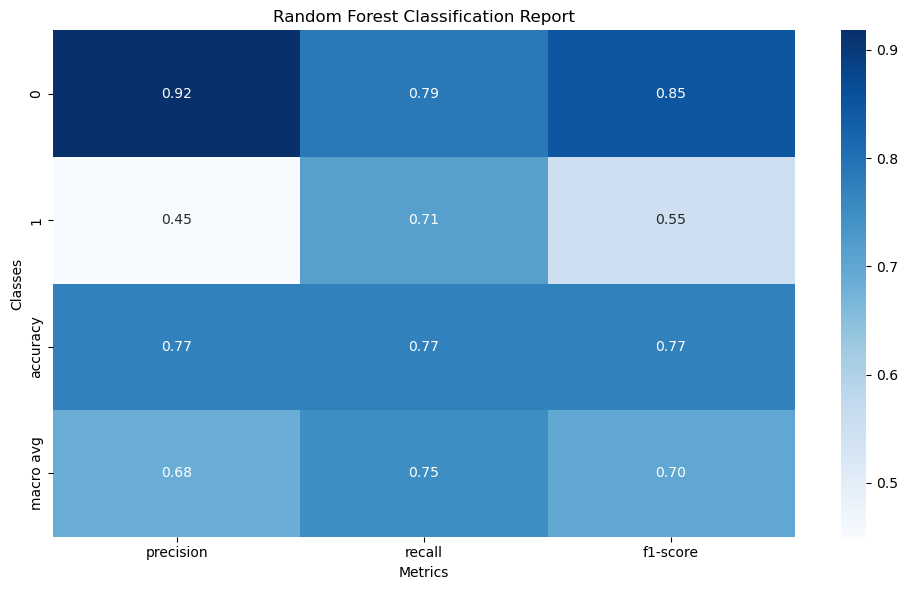

In [ ]:
def classification_report_to_df(y_test, y_pred, target_names):
    report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    df = pd.DataFrame(report_dict).transpose()
    return df

rf_report_df = classification_report_to_df(
    y_test, y_pred_custom, target_names=[str(cls) for cls in best_model.classes_]
)

plt.figure(figsize=(10, 6)) 
sns.heatmap(
    rf_report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues"
)
plt.title("Random Forest Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


## One taboo in ML is fitting scalers and encoders to the whole dataset. Why?

Data Leakage 

It happends when the test set is accidentaly used to train the model. Because of scaling and encoding all the table (test & training) the model have access information of the test set which falsely show the performance. 

Overfitting

The models will learn the pattern from the test data during training because of scaling or encoding the entire data. This cause the model to perform well on training data. Makes cross-validation better but worse real-world because of unseen data


Misleading Performance Metric

If the test data is used during the scaling or encoding process, performance metrics like accuracy, precision, recall, etc., will not reflect the true generalization ability of the model. If all of it used one hot encoding, it will show inflated performance score.


## Tell me a joke related to Machine Learning

Why does machine learning only have a subject and a predicate? Because the object hasn't been predicted yet, it's still learning!